<h1 style="font-size:70px">DETEKSI OBJEK MOBIL PADA PARKIRAN MENGGUNAKAN ALGORITMA HOUGH LINES</h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot

In [ ]:
# input gambar dari drive
img = cv2.imread(filename='/content/drive/MyDrive/assets/p_lost4.jpeg')

In [27]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');

def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray');

In [28]:
# grayscale gambar dari yang bewarna menjadi bnw
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Efek blur Gaussian yg pas untuk menghilangkan lebih banyak noise pd gambar yang tidak perlu
# Memberikan efek blur pada setiap 5x5 px
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0) # untuk mengatur halusnya blur

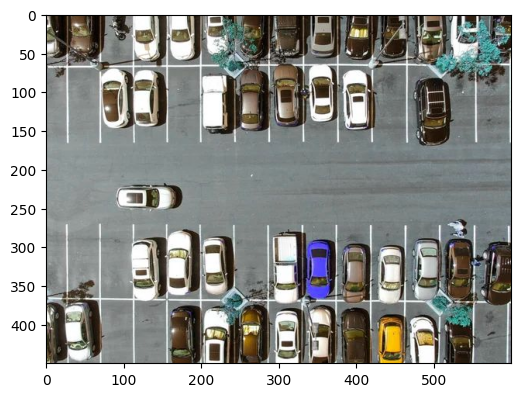

In [30]:
plot_image(img=img)

In [31]:
# untuk mendeteksi tepi menggunakan algoritma canny
low_threshold = 50 # semakin rendah akan semakin banyak garis tidak penting
high_threshold = 150 # menguatkan garis
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

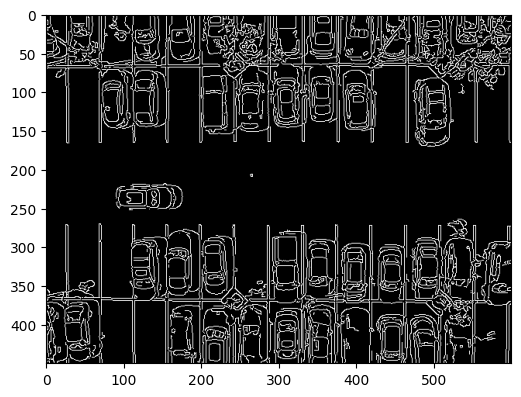

In [32]:
plot_image(img=edges)

In [35]:
rho = 1
theta = np.pi / 180
threshold = 15
min_line_length = 50
max_line_gap = 20
line_image = np.copy(img) * 0

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
      cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

In [36]:
# Menggambar garis diatas gambar
lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)

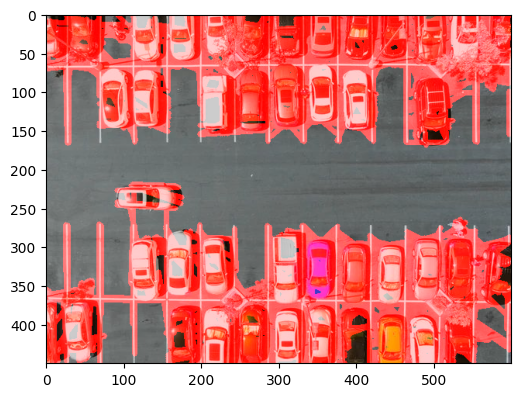

In [37]:
plot_image(lines_edges)